The purpose of this notebook is to explain the very fundamentals of image analysis.

The Notebook includes examples of:

1. Loading and visualizing a grayscale image using numpy and matplotlib
2. Loading and visualizing colour images using the same packages
3. Manipulating individual pixels in an image and also applying filters
4. Visualizing Red, Green and Blue channels of a color image in isolation
5. The theory behind sobel filters and edge detection
6. Applying Sobel filter for edge detection on an example image using numpy
7. Applying Sobel filter for edge detection on a colour image
8. Using skimage for edge detection 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# using this only to load images
from skimage import data

## What is an image?

The simplest image you can make is just a 2d matrix of numbers:



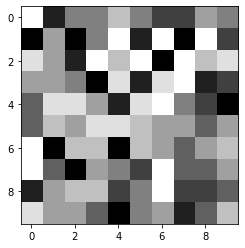

In [2]:
random_image = np.random.randint(0, 9, (10, 10))
plt.imshow(random_image, cmap='gray');

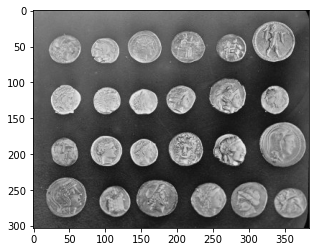

In [3]:
coins = data.coins()
plt.imshow(coins, cmap='gray');

<b>A color image will also have 3 channels, to represent Red, Green and Blue</b>

<img src="https://miro.medium.com/max/462/1*CBY94wikMUCZMB4-Xxs-pw.png" />

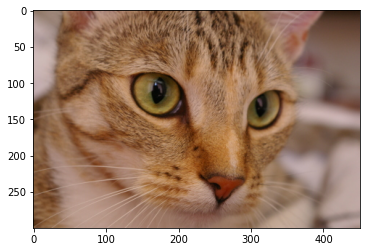

In [4]:
cat = data.cat()
plt.imshow(cat);

Invesigating what happens when we change the values:

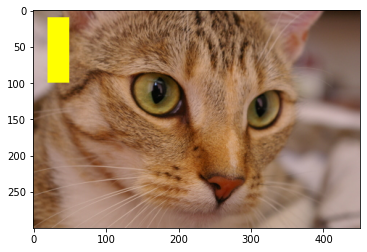

In [5]:
# drawing on the image

cat[10:100, 20:50, :] = [255, 255, 0]
plt.imshow(cat);

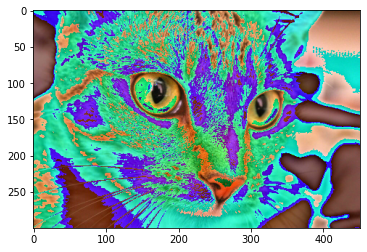

In [6]:
cat = data.cat()

cat[:, :] = np.array((cat[:, :] * 2).astype(np.int))
plt.imshow(cat);

## Separating the different color channels

In [7]:
beach = plt.imread('./imgs/beach.jpg')

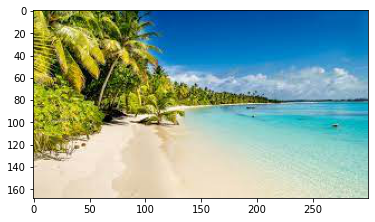

In [8]:
plt.imshow(beach);

In [9]:
r = beach[:, :, 0]
g = beach[:, :, 1]
b = beach[:, :, 2]

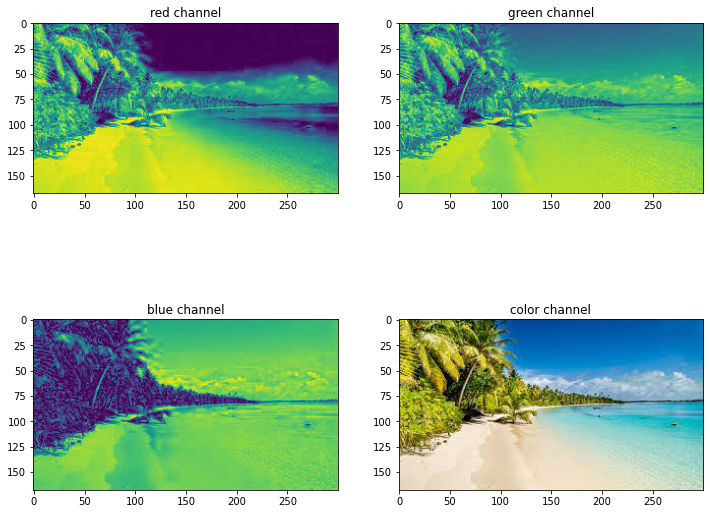

In [10]:
f, axes = plt.subplots(2, 2, figsize=(12,10))
axes[0, 0].imshow(r)
axes[0, 0].set_title('red channel')

axes[0, 1].imshow(g)
axes[0, 1].set_title('green channel')

axes[1, 0].imshow(b)
axes[1, 0].set_title('blue channel')

axes[1, 1].imshow(beach);
axes[1, 1].set_title('color channel');

Why do the above images look the way they do ?

### Edge Detection using Sobel Filters

<b> What is a Sobel filter?</b>

<img src="./imgs/sobel_visual.png" />
<img src="./imgs/sobel_visual2.png" />

it is a simple element-wise multiplication of the filter and the bounding box.

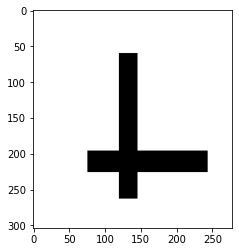

In [11]:
# Load the image with edges

img = plt.imread('./imgs/image_with_edges.png')
plt.imshow(img);

In [12]:
# Create the filters

vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]


# get the size so we know what size the conv kernel should be
n,m,d = img.shape

## First we will work on the vertical filters:

In [13]:
vertical_edges_img = np.zeros_like(img)

In [14]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        transformed_pixels = vertical_filter*local_pixels
        vertical_score = (transformed_pixels.sum() + 4)/8
        vertical_edges_img[row, col] = [vertical_score]*3

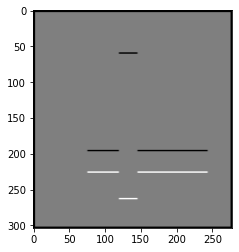

In [15]:
# plt.figure(figsize=(8, 12))
plt.imshow(vertical_edges_img);

## Now the same for horizontal filters

In [16]:
horizontal_edges_img = np.zeros_like(img)

Similar to applying the vertical filter except we will be using the horizontal filter

In [17]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4)/8
        horizontal_edges_img[row, col] = [horizontal_score]*3

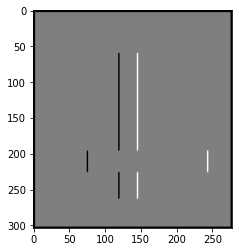

In [18]:
plt.imshow(horizontal_edges_img);

## Now Apply both filters together

In [19]:
edges_img = np.zeros_like(img)

In [20]:
for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()

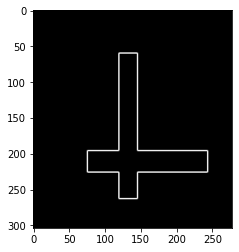

In [21]:
plt.imshow(edges_img);

### A more complex image

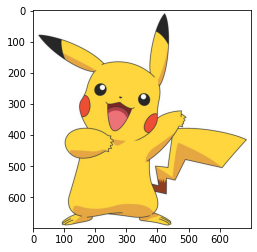

In [22]:
# read in the image and display it

img = plt.imread('./imgs/pika.jpg')
plt.imshow(img);

In [23]:
# These two lines convert the above image to greyscale

grey_img = img.mean(axis=2, keepdims=True)/255.0
grey_img = np.concatenate([grey_img]*3, axis=2)

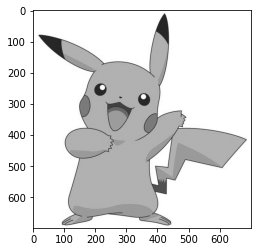

In [24]:
plt.imshow(grey_img);

In [25]:
edges_img = np.zeros_like(grey_img)

In [26]:
n,m,d = grey_img.shape

for row in range(3, n-2):
    for col in range(3, m-2):
        local_pixels = grey_img[row-1:row+2, col-1:col+2, 0]
        
        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()/4
        
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()

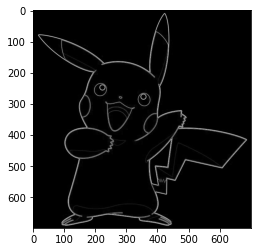

In [27]:
plt.imshow(edges_img)

In [28]:
# plt.imshow(edges_img[350:525, 500:])

## Why do this?

1. Storage considerations
2. As a preprocessing step for other more complex models, where all data from an image is not needed
3. For applications programming (GIMP etc... )

# BONUS

### How can we do all the above much faster? ( and a lot fewer lines of code)

# ..using scikit-image!!

In [29]:
from skimage import filters

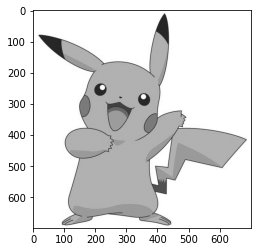

In [30]:
img = img = plt.imread('./imgs/pika.jpg')
grey_img = img.mean(axis=2, keepdims=True)/255.0
grey_img = np.concatenate([grey_img]*3, axis=2)
plt.imshow(grey_img);

In [31]:
edge_sobel = filters.sobel(grey_img)

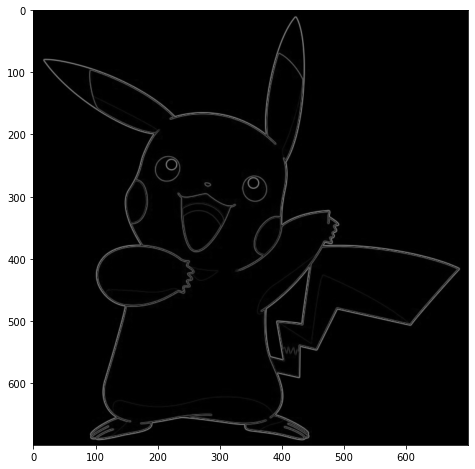

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(edge_sobel);

# Where to go from here? What's next?

1. Continue experimenting with other kinds of filters and research their uses.
2. Learn more about convolutions and how they can be used to manipulate one image or a group of images
3. Learn more about different ways to represent colors and image data

References:

1. Some code and visualizations for Sobel: http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/

2. skimage docs for filter application: https://scikit-image.org/docs/stable/api/skimage.filters.html

3. docs for numpy:https://numpy.org/doc/

4. docs for matplotlib: https://matplotlib.org/stable/contents.html


# <center> END </center>